# Pileup Exercises 


## Measuring pileup
Before we get into mitigating pileup effects, let's first examine measures of pileup in more detail. We will discuss event-by-event variables that can be used to characterize the pileup and this will give us some hints into thinking about how to deal with it.

If you are familiar with the ROOT command line (clang) then all of the quantities we want to look at can be computed interactively. However, to move things along we have provided a set of python commands which will display the necessary information.

In [1]:
# Loads the ROOT environment and style
import ROOT as r
from collections import OrderedDict
from Analysis.JMEDAS.tdrstyle_mod14 import *

# Set the ROOT style
r.gROOT.Macro("rootlogon.C")
setTDRStyle()

Welcome to JupyROOT 6.10/09


/cvmfs/cms.cern.ch/slc7_amd64_gcc630/lcg/root/6.10.08-fmblme/lib/ROOT.py:432: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


(13 TeV)
(13 TeV)
(13 TeV)
(13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


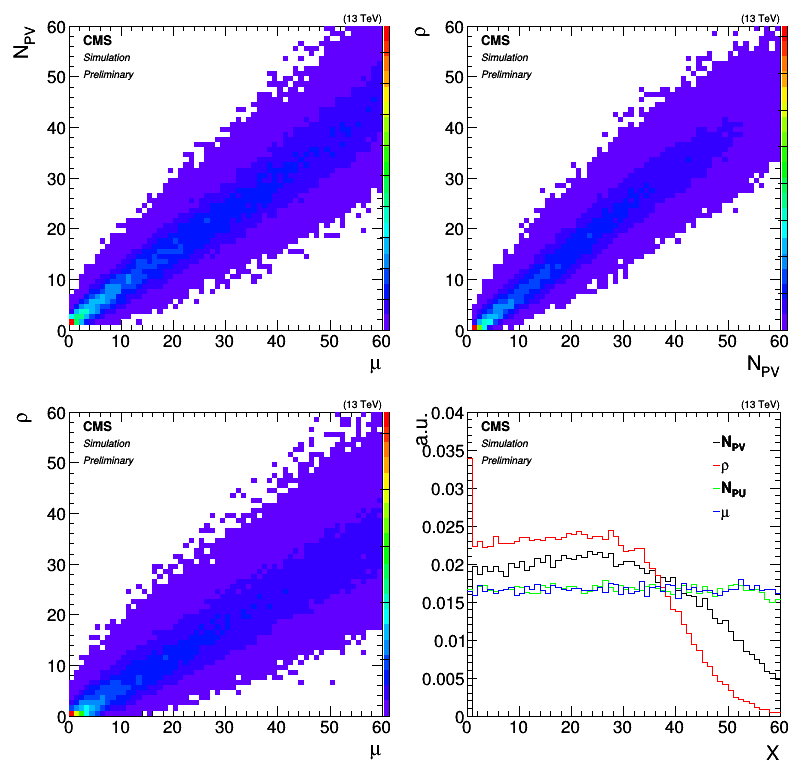

In [14]:
#Settings for each of the pads in the canvas
settingsTMP = {'X'         : (4,0.0,60.0,0.0,0.04,"X","a.u."),
               'RhoVsNpv'  : (2,0.0,60.0,0.0,60.0,"N_{PV}","#rho"),
               'NpvVsTnpu' : (1,0.0,60.0,0.0,60.0,"#mu","N_{PV}"),
               'RhoVsTnpu' : (3,0.0,60.0,0.0,60.0,"#mu","#rho")
               }
settings = OrderedDict(sorted(settingsTMP.items(), key=lambda x:x[1], reverse=False))

# Create and draw the canvas
frames = []
for f, s in enumerate(settings) :
    frame = r.TH1D()
    frames.append(frame)
    frames[f].GetXaxis().SetLimits(settings[s][1],settings[s][2])
    frames[f].GetYaxis().SetRangeUser(settings[s][3],settings[s][4])
    frames[f].GetXaxis().SetTitle(settings[s][5])
    frames[f].GetYaxis().SetTitle(settings[s][6])
c = tdrCanvasMultipad("c",frames,14,10,2,2)

# Open the ROOT file with the ntuple
f = r.TFile("JECNtuple_MiniAOD.root")

# Access and store the necessary trees
tAK4PFchs   = f.Get("AK4PFCHSL1L2L3/t")

# Crease some histograms
hAK4PFchs_npv        = r.TH1D("hAK4PFchs_npv","hAK4PFchs_npv",60,0,60)
hAK4PFchs_rho        = r.TH1D("hAK4PFchs_rho","hAK4PFchs_rho",60,0,60)
hAK4PFchs_npu        = r.TH1D("hAK4PFchs_npu","hAK4PFchs_npu",60,0,60)
hAK4PFchs_tnpu       = r.TH1D("hAK4PFchs_tnpu","hAK4PFchs_tnpu",60,0,60)
hAK4PFchs_rhovsnpv   = r.TH2F("hAK4PFchs_rhovsnpv","hAK4PFchs_rhovsnpv",60,0,60,60,0,60)
hAK4PFchs_npvvsnpu   = r.TH2F("hAK4PFchs_npvvsnpu","hAK4PFchs_npvvsnpu",60,0,60,60,0,60)
hAK4PFchs_rhovsnpu   = r.TH2F("hAK4PFchs_rhovsnpu","hAK4PFchs_rhovsnpu",60,0,60,60,0,60)

# Fill the histograms
tAK4PFchs.Draw("npv:tnpus[12]>>hAK4PFchs_npvvsnpu","","goff")
tAK4PFchs.Draw("rho:npv>>hAK4PFchs_rhovsnpv","","goff")
tAK4PFchs.Draw("rho:tnpus[12]>>hAK4PFchs_rhovsnpu","","goff")

tAK4PFchs.Draw("npv>>hAK4PFchs_npv","","goff")
tAK4PFchs.Draw("rho>>hAK4PFchs_rho","","goff")
tAK4PFchs.Draw("npus[12]>>hAK4PFchs_npu","","goff")
tAK4PFchs.Draw("tnpus[12]>>hAK4PFchs_tnpu","","goff")

#Scale the histograms to be the same height
hAK4PFchs_npv.Scale(1.0/hAK4PFchs_npv.Integral())
hAK4PFchs_rho.Scale(1.0/hAK4PFchs_rho.Integral())
hAK4PFchs_npu.Scale(1.0/hAK4PFchs_npu.Integral())
hAK4PFchs_tnpu.Scale(1.0/hAK4PFchs_tnpu.Integral())

#Draw the histograms
c.cd(1)
tdrDraw(hAK4PFchs_npvvsnpu,"colz")
c.cd(2)
tdrDraw(hAK4PFchs_rhovsnpv,"colz")
c.cd(3)
tdrDraw(hAK4PFchs_rhovsnpu,"colz")
c.cd(4)
tdrDraw(hAK4PFchs_npv,"HIST",r.kNone,r.kBlack,r.kSolid,-1,0,0)
c.cd(4)
tdrDraw(hAK4PFchs_rho,"HIST",r.kNone,r.kRed,r.kSolid,-1,0,0)
c.cd(4)
tdrDraw(hAK4PFchs_npu,"HIST",r.kNone,r.kGreen,r.kSolid,-1,0,0)
c.cd(4)
tdrDraw(hAK4PFchs_tnpu,"HIST",r.kNone,r.kBlue,r.kSolid,-1,0,0)

# Add entries to the legend and draw it
c.cd(4)
l_X = tdrLeg(0.8,0.65,0.9,0.9)
l_X.AddEntry(hAK4PFchs_npv,"N_{PV}","l")
l_X.AddEntry(hAK4PFchs_rho,"#rho","l")
l_X.AddEntry(hAK4PFchs_npu,"N_{PU}","l")
l_X.AddEntry(hAK4PFchs_tnpu,"#mu","l")
l_X.Draw("same")

c.Update()
c.Draw()

<font color='red'>Question 1: Why are there a different amount of pileup interactions than primary vertices?</font><details>
<summary><font color='blue'>Show answer...</font></summary>
There is a vertex finding efficiency, which in Run I was about 72%. This means that $N_{PV}\simeq0.72{\cdot}N_{PU}$
</details>

<font color='red'>Question 2: How many pileup interactions are simulated before and after the in-time bunch crossing?</font><details>
<summary><font color='blue'>Hint</font></summary>
Try running the command `t.Scan("bxns:tnpu:npu")`
</details><details>
<summary><font color='blue'>Show answer...</font></summary>
There are 12 interactions before and 3 after.
</details>

<font color='red'>Question 3: Rho is the measure of the density of the pileup in the event. It's measured in terms of GeV per unit area. Can you think of ways we can use this information the correct for the effects of pileup?</font><details>
<summary><font color='blue'>Show answer...</font></summary>
From the jet $p_{T}$ simply subtract off the average amount of pileup expected in a jet of that size. Thus $p_{T}^{corr}{\simeq}p_{T}^{reco}-\rho{\cdot}area$
</details>

<font color='red'>Question 4: This plot shows the jet composition. Generally, why do we see the mixture of photons, neutral hadrons and charged hadrons that we see?</font><details>
<summary><font color='blue'>Show answer...</font></summary>
A majority of the constituents in a jet come from pions. Pions come in neutral ($\pi^{0}$) and charged ($\pi^{\pm}$) varieties. Naively you would expect the composition to be two thirds charged hadrons and one third neutral hadrons. However, we know that $\pi^{0}$ decays to two photons, which leads to a large photon fraction.
</details>